# Module 3 Peer Review

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

# import shap
# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

import imblearn

from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


import feature_engine

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures 
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from feature_engine.selection import SelectBySingleFeaturePerformance



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Quick Data Glance

In [2]:
df = pd.read_csv("boston.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.dtypes.value_counts()

float64    11
int64       3
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [8]:
df.shape

(506, 14)

In [9]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'], dtype='object')

In [10]:
df["chas"] = df["chas"].astype("category")

In [11]:
df.dtypes.value_counts()

float64     11
int64        2
category     1
dtype: int64

**==================================================================================================================**

## Logistic Regression (StatsModel)

In [12]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'], dtype='object')

In [13]:
df.shape

(506, 14)

In [14]:
X = df[['indus','medv']]
y = df[['chas']]

In [15]:
X.values, y.values

(array([[ 2.31, 24.  ],
        [ 7.07, 21.6 ],
        [ 7.07, 34.7 ],
        ...,
        [11.93, 23.9 ],
        [11.93, 22.  ],
        [11.93, 11.9 ]]),
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [

In [16]:
X = sm.add_constant(X)

In [17]:
logreg1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.229298
         Iterations 7


In [18]:
logreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   chas   No. Observations:                  506
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            2
Date:                Sun, 09 Jul 2023   Pseudo R-squ.:                 0.08823
Time:                        19:58:08   Log-Likelihood:                -116.02
converged:                       True   LL-Null:                       -127.25
Covariance Type:            nonrobust   LLR p-value:                 1.331e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4786      0.669     -8.184      0.000      -6.791      -4.167
indus          0.0818      0.027      3.039      0.002       0.029       0.135
medv           0.0777      0.016      4.721      0.000       0.045       0.110
==============================================================================
"""

In [19]:
logreg_pred1 = logreg1.predict(exog=X)

In [20]:
logreg_pred1

0     0.03
1     0.04
2     0.10
3     0.06
4     0.08
      ... 
501   0.06
502   0.05
503   0.07
504   0.06
505   0.03
Length: 506, dtype: float64

## Logistic Regression (Scikit Learn)

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.

### Logistic Regression model

In [21]:
X = df[['indus','medv']]
y = df[['chas']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 2), (102, 2), (404, 1), (102, 1))

In [24]:
Counter(y_train), Counter(y_test)

(Counter({'chas': 1}), Counter({'chas': 1}))

In [25]:
logreg1 = LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [26]:
logreg1.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [27]:
logreg_pred1 = logreg1.predict(X_test)

In [28]:
logreg_pred1[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
logreg1.coef_

array([[0.01955845, 0.03299472]])

In [30]:
logreg1.intercept_

array([-3.45893393])

### Logistic Model Evaluation

In [31]:
print(classification_report(y_test,logreg_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        95
           1       0.00      0.00      0.00         7

    accuracy                           0.93       102
   macro avg       0.47      0.50      0.48       102
weighted avg       0.87      0.93      0.90       102



In [32]:
cm = confusion_matrix(y_test,logreg_pred1)
cm

array([[95,  0],
       [ 7,  0]], dtype=int64)

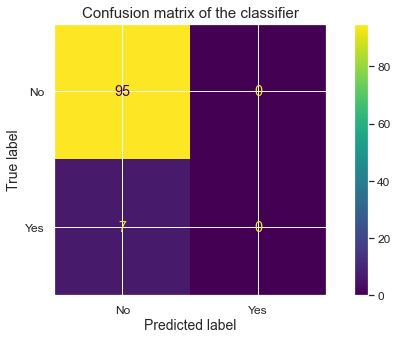

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=logreg1, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)
plt.show()

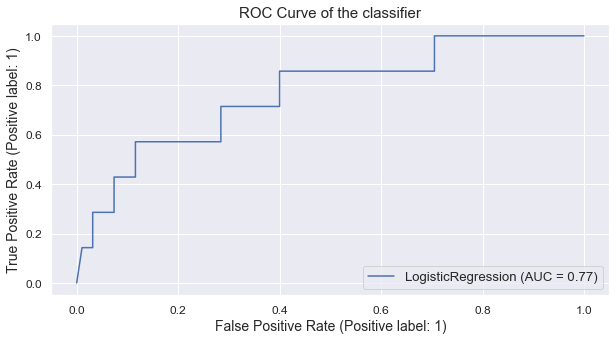

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=logreg1, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

In [35]:
lrtable = pd.DataFrame()
lrtable = lrtable.append({'Model': "Logistic Regression",
                        'F1':  f1_score(y_test, logreg_pred1),
                        'Recall': recall_score(y_test, logreg_pred1),
                        'Precision': precision_score(y_test, logreg_pred1),
                        'Accuracy': accuracy_score(y_test, logreg_pred1),
                        'ROC-AUC': roc_auc_score(y_test, logreg_pred1)
                      },
                        ignore_index=True)
                     
lrtable

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Logistic Regression,0.00,0.00,0.00,0.93,0.50


**Deliverable 2**

We have fitted a model to predict a response variable with two classes (Yes/ No). 

Interpretation - 
Regression Model -Both the predictor variables "INDUS" and "MEDV" predict higher probability that the tract will bound Charles river. 

Error Matrix - The error rate is around 7%. However, the error rate across two classes is quite different. For positive class, the prediction error is close to 94%, while for the negative class it is merely 0.5 %


**Deliverable 3**

**==================================================================================================================**